Last modified by Soshant Bali on 12/7/2016

In [91]:
import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [92]:
auto_df = pd.read_csv('data/Auto.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [93]:
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [94]:
#Create a new variable mpg01 that contains 1 if mpg is above median, else 0
bool_mpg_above_median=auto_df['mpg']>auto_df['mpg'].median()
auto_df['boolean_mpg_above_median']=bool_mpg_above_median
auto_df['boolean_mpg_above_median']=auto_df['boolean_mpg_above_median'].astype(int)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,boolean_mpg_above_median
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


(a) The dataframe with new variable boolean_mpg_above_median is shown above

In [95]:
#Correlation matrix is as follows
auto_df.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin,boolean_mpg_above_median
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698,0.838239
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972,-0.740327
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664,-0.738607
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265,-0.745734
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084,0.322629
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314,0.454108
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000,0.511393
boolean_mpg_above_median,0.838239,-0.740327,-0.738607,-0.745734,0.322629,0.454108,0.511393,1.000000


(b) we see here negative correlation of mpg above median with weight, cylendirs, and displacement; and positive correlation with origin, year, and acceleration.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012989550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000168E8D30>]], dtype=object)

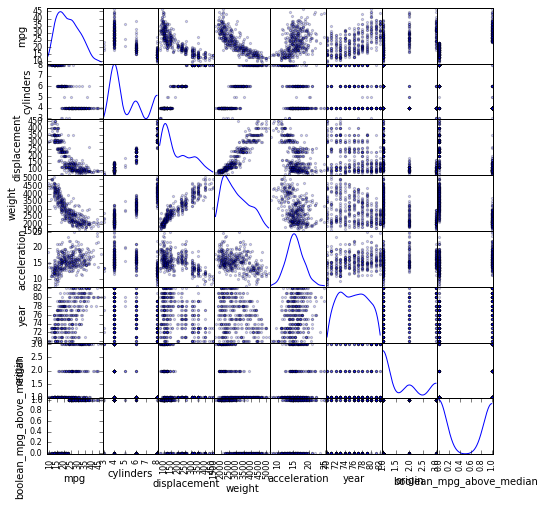

In [96]:
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
scatter_matrix(auto_df,alpha=0.2,figsize=(8,8),diagonal='kde')

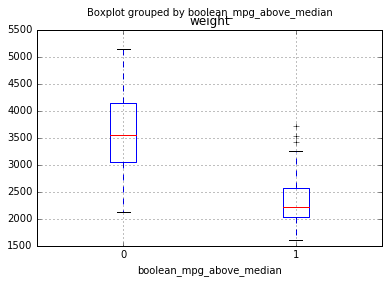

In [97]:
plt.figure()
bp=auto_df.boxplot(column=['weight'],by='boolean_mpg_above_median')

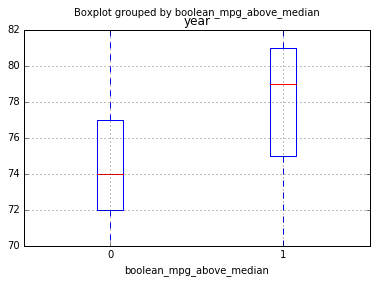

In [98]:
plt.figure()
bp=auto_df.boxplot(column=['year'],by='boolean_mpg_above_median')

In [99]:
#clean up the data (remove some rows with partial information, e.g., some rows in horsepower have ? instead of data)
auto_df = auto_df[auto_df['horsepower'].apply(lambda x:x.isnumeric())]
auto_df['horsepower']=auto_df['horsepower'].astype('int64')
auto_df['horsepower'].dtype

dtype('int64')

In [100]:
#Split the dataframe into test and train sets
mask = np.random.rand(len(auto_df)) < 0.8
train_auto_df = auto_df[mask]
test_auto_df = auto_df[~mask]
print (len(auto_df), len(train_auto_df), len (test_auto_df))

392 311 81


(c) Train and test data frames are shown above

In [101]:
#Perform Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf=LDA()
clf.fit(train_auto_df.loc[:,'cylinders':'origin'].values,train_auto_df['boolean_mpg_above_median'])
test_predictions = clf.predict(test_auto_df.loc[:,'cylinders':'origin'].values)
test_actual = test_auto_df.loc[:,'boolean_mpg_above_median'].values
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_actual, test_predictions).ravel()
print(tn, fp, fn, tp)
error_percent = (fp+fn)*100/(tn+fp+fn+tp)
print(error_percent)

40 3 0 38
3.7037037037


(d) error calculations shown above

In [102]:
#Perform Quadratic Discriminant Analysis (QDA)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
clf=QDA()
clf.fit(train_auto_df.loc[:,'cylinders':'year'].values,train_auto_df['boolean_mpg_above_median'])
test_predictions = clf.predict(test_auto_df.loc[:,'cylinders':'year'].values)
test_actual = test_auto_df.loc[:,'boolean_mpg_above_median'].values
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_actual, test_predictions).ravel()
print(tn, fp, fn, tp)
error_percent = (fp+fn)*100/(tn+fp+fn+tp)
print(error_percent)

40 3 1 37
4.93827160494


(e) QDA performed worse than LDA

In [103]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
gl_model = smf.glm(formula='boolean_mpg_above_median~cylinders+displacement+horsepower+weight+acceleration+year+origin', family=sm.families.Binomial(), data=train_auto_df)
glm_result = gl_model.fit()
print(glm_result.summary())

                    Generalized Linear Model Regression Results                     
Dep. Variable:     boolean_mpg_above_median   No. Observations:                  311
Model:                                  GLM   Df Residuals:                      303
Model Family:                      Binomial   Df Model:                            7
Link Function:                        logit   Scale:                             1.0
Method:                                IRLS   Log-Likelihood:                -62.570
Date:                      Wed, 07 Dec 2016   Deviance:                       125.14
Time:                              09:54:31   Pearson chi2:                     141.
No. Iterations:                          10                                         
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -23.0256      6.595     -3.491      0.000       -35.952   

In [104]:
#Predict on training data using the Logistic regression model and evaluate predictions
log_reg_predict_probs = glm_result.predict(test_auto_df.loc[:,'cylinders':'origin'])
bool_log_reg_pred = log_reg_predict_probs > 0.5
predicted_log_reg_values = bool_log_reg_pred.astype('int')
true_test_values = test_auto_df['boolean_mpg_above_median'].values
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(true_test_values, predicted_log_reg_values).ravel()
print(tn, fp, fn, tp)
error_percent = (fp+fn)*100/(tn+fp+fn+tp)
print(error_percent)

39 4 1 37
6.17283950617
